In [ ]:
import os

# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [ ]:
os.chdir("res")

In [ ]:
# load dataset and EDA
df = pd.read_csv("heart_disease_uci.csv")
df = df.drop(['id'],axis=1)
df.info()

<Figure size 640x480 with 0 Axes>

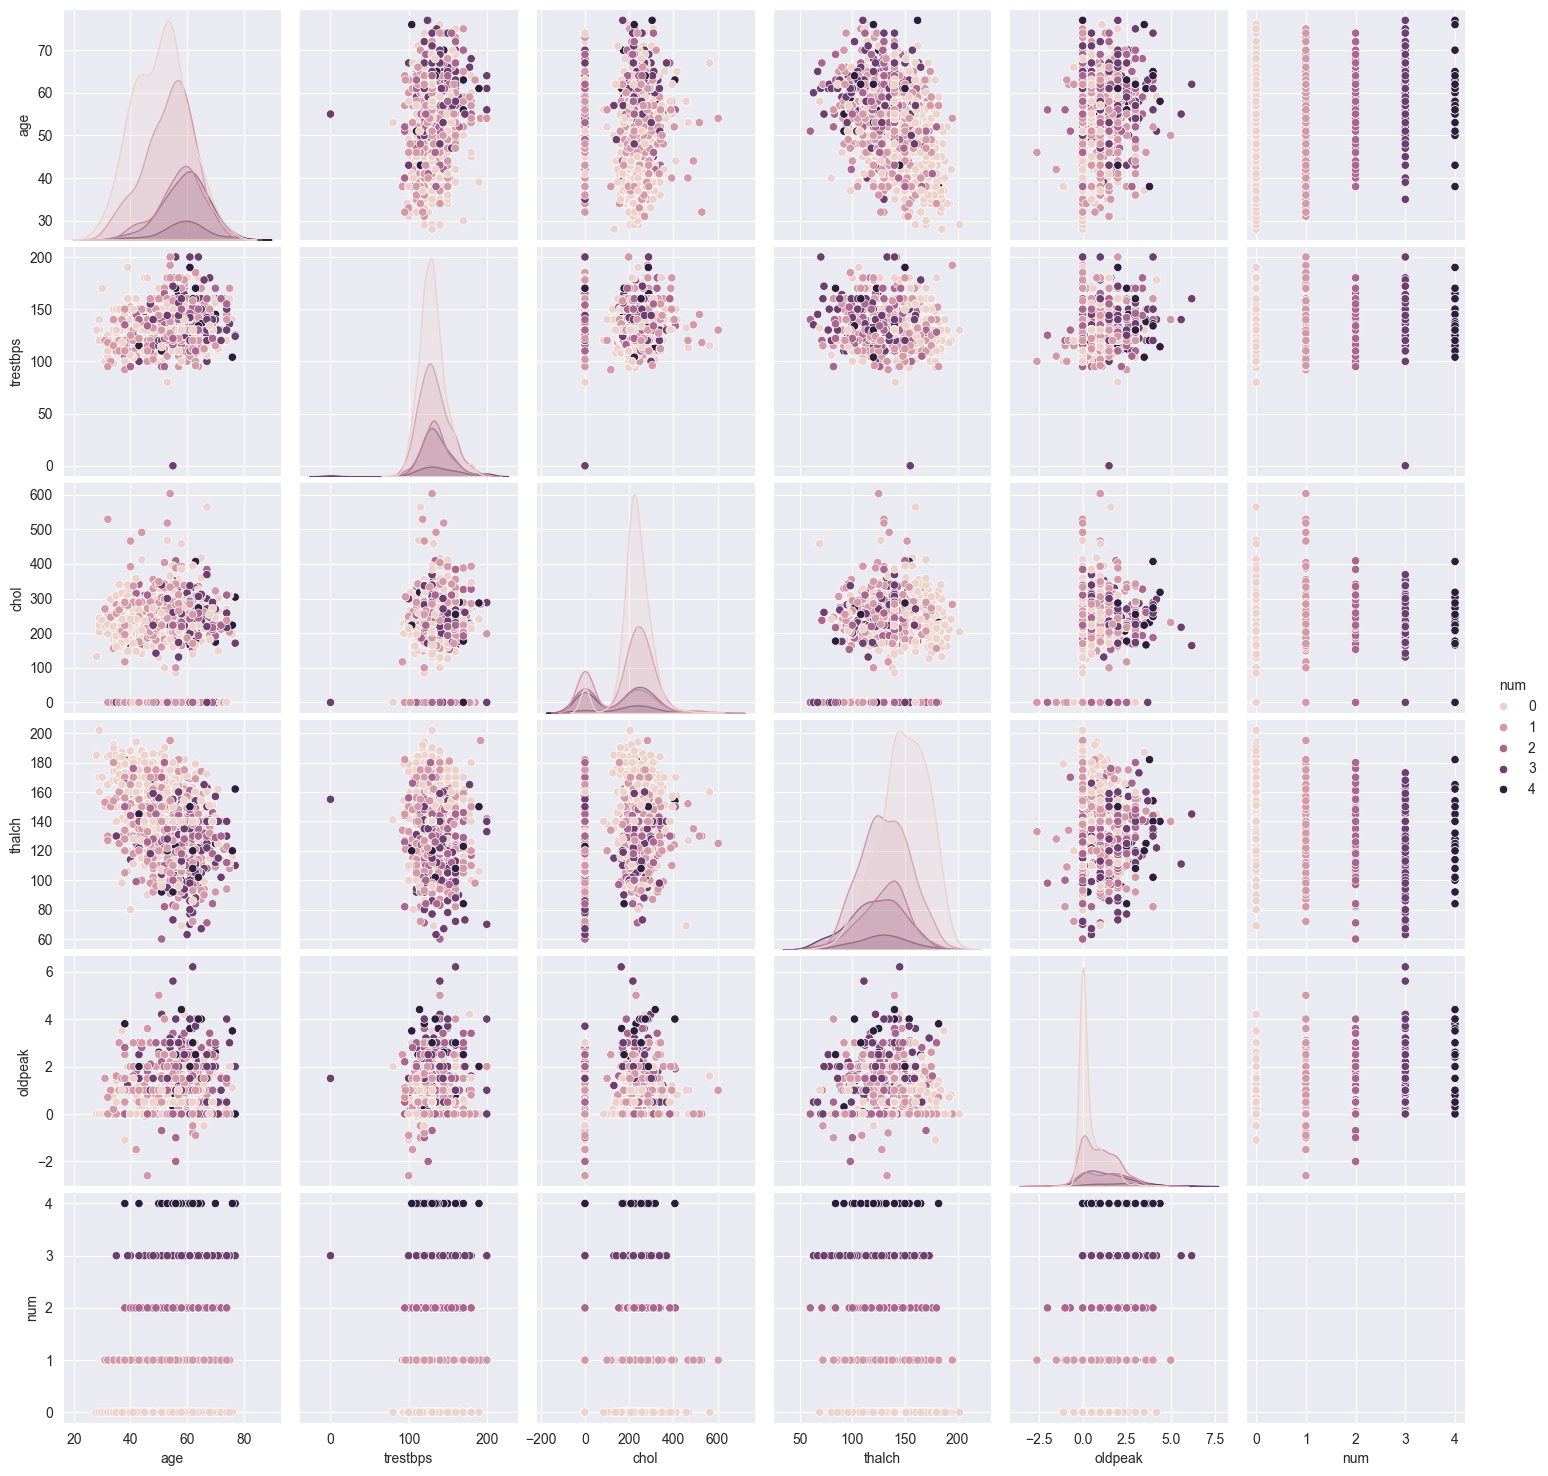

In [83]:
numerical_futures = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure()
sns.pairplot(df,vars=numerical_futures,hue="num")
plt.show()

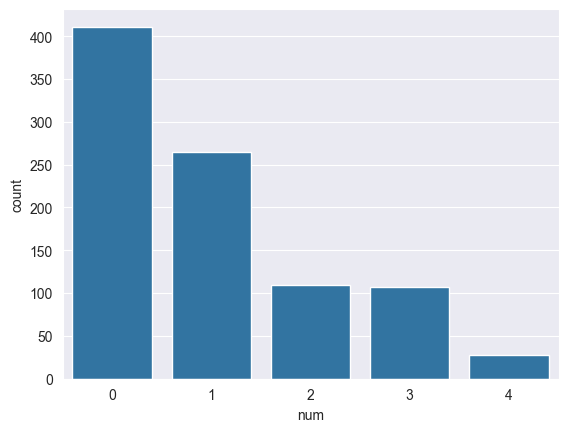

In [84]:
plt.figure()
sns.countplot(x="num",data=df)
plt.show()

In [ ]:
# handling missing value
print(df.isnull().sum()) # ca -> 611 loss so:
df = df.drop(['ca'],axis=1)
df.columns


In [ ]:
def fill_with_median(col): # numeric
    df[col].fillna(df[col].median(), inplace=True)

def fill_with_mode(col): # categorical
    df[col].fillna(df[col].mode()[0], inplace=True)  


In [ ]:
numeric_features = ['trestbps','chol','thalch','oldpeak']
categorical_features = ['fbs','restecg','exang','thal','slope']


In [ ]:
for feature in numeric_features+categorical_features:
    if feature in numeric_features:
        fill_with_median(feature)
    else:
        fill_with_mode(feature)

df.isnull().sum()        

In [ ]:
# train-test split
X = df.drop(['num'],axis=1)
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
categorical_features += ['sex','dataset','cp'] #not null features
numeric_features += ['age']

In [ ]:
X_train_num = X_train[numeric_features]
X_test_num = X_test[numeric_features]

scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)


In [85]:
#for categorical to numeric convert
encoder = OneHotEncoder(sparse_output=False, drop="first") 


X_train_cat = X_train[categorical_features]
X_test_cat = X_test[categorical_features]

X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

X_train_cat_encoded

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [86]:
X_train_transformed = np.hstack((X_train_cat_encoded,X_train_num_scaled))
X_test_transformed = np.hstack((X_test_cat_encoded,X_test_num_scaled))

X_train_transformed

array([[ 0.        ,  0.        ,  1.        , ..., -2.35468966,
         1.06644251,  0.90309788],
       [ 0.        ,  1.        ,  0.        , ..., -0.29440081,
         1.9947197 ,  0.14462757],
       [ 0.        ,  1.        ,  0.        , ...,  1.0130902 ,
        -0.23314556,  0.36133337],
       ...,
       [ 1.        ,  1.        ,  0.        , ..., -1.00757772,
         1.06644251,  2.31168561],
       [ 0.        ,  1.        ,  0.        , ...,  0.18105047,
         1.06644251, -0.07207823],
       [ 0.        ,  0.        ,  0.        , ...,  0.85460644,
        -0.79011188,  0.36133337]])